In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics

In [2]:
train_df = pd.read_csv('Titanic_train.csv')

29.69911764705882
-------------------------------------------------------------------------------
14.526497332334044


C:\Users\Andy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Andy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


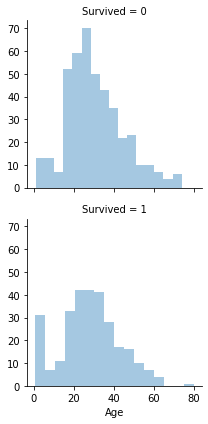

In [9]:
print(train_df['Age'].mean())
print('-------------------------------------------------------------------------------')
print(train_df['Age'].std())

g = sns.FacetGrid(train_df, 'Survived')
g.map(sns.distplot, 'Age', kde = False)

In [11]:
print(train_df['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [14]:
def z_score(data, times):
    mean = np.mean(data)
    std  = np.std(data)
    z_score = [(x - mean) / std for x in data]
    return np.where(np.abs(z_score) > times)

out_index = z_score(train_df['Age'], 3)

print(out_index)
print(train_df.loc[out_index[0],'Age'])

(array([630, 851], dtype=int64),)
630    80.0
851    74.0
Name: Age, dtype: float64


In [16]:
def outliers_iqr(ys,times):
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))

out_index2 = outliers_iqr(train_df['Age'],1.5)
print(out_index2)
print(train_df.loc[out_index2[0],'Age'])

(array([ 33,  54,  96, 116, 280, 456, 493, 630, 672, 745, 851], dtype=int64),)
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


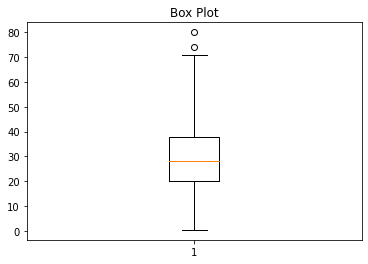

In [17]:
plt.boxplot(train_df['Age'][~np.isnan(train_df['Age'])],whis=2)    #作圖
plt.title('Box Plot')
plt.show()